**Задача**

Этот набор данных содержит опрос удовлетворенности авиапассажиров. Какие факторы сильно коррелируют с удовлетворенным (или неудовлетворенным) пассажиром? Возможно предсказать удовлетворенность пассажиров?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import sklearn

In [3]:
df_train = pd.read_csv('train.csv')
df_train

In [4]:
df_train.drop(['Unnamed: 0', 'id'], axis=1,inplace=True)

* work_year: год выплаты зарплаты.

* experience_level: уровень опыта работы в течение года

* employment_type: тип занятости для роли

* job_title: должность, в которой работал в течение года.

* salary: общая сумма выплаченной валовой зарплаты.

* salary_currency: валюта выплачиваемой зарплаты в соответствии с кодом валюты ISO 4217.

* salaryinusd: зарплата в долларах США

* employee_residence: основная страна проживания сотрудника в течение рабочего года в соответствии с кодом страны ISO 3166.

* remote_ratio: общий объем работы, выполненной удаленно

* company_location: страна расположения главного офиса или филиала работодателя

* company_size: среднее количество людей, работавших в компании в течение года

### Поиск и обработка пустых пропущенных значений

In [5]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
df_train.dropna(axis=0, inplace=True)

In [7]:
df_train.reset_index(drop=True, inplace=True)

### Обработка категориальных признаков

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [13]:
df_train.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [14]:
gender = {'Female': 1, 'Male': 2}
cust_type = {'Loyal Customer': 1, 'disloyal Customer': 2}
travel_type = {'Personal Travel': 1, 'Business travel': 2}
cclass = {'Eco Plus': 1, 'Business': 2, 'Eco': 3}
satisfaction = {'neutral or dissatisfied': 1, 'satisfied': 2}
for i in range(len(df_train)):
    df_train.at[i, 'Gender'] = int(gender[df_train['Gender'][i]])
    df_train.at[i, 'Customer Type'] = int(cust_type[df_train['Customer Type'][i]])
    df_train.at[i, 'Type of Travel'] = int(travel_type[df_train['Type of Travel'][i]])
    df_train.at[i, 'Class'] = int(cclass[df_train['Class'][i]])
    df_train.at[i, 'satisfaction'] = int(satisfaction[df_train['satisfaction'][i]])
    
df_train['Gender'] = df_train['Gender'].astype(int)
df_train['Customer Type'] = df_train['Customer Type'].astype(int)
df_train['Type of Travel'] = df_train['Type of Travel'].astype(int)
df_train['Class'] = df_train['Class'].astype(int)
df_train['satisfaction'] = df_train['satisfaction'].astype(int)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int32  
 1   Customer Type                      103594 non-null  int32  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int32  
 4   Class                              103594 non-null  int32  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

### Анализ данных

In [16]:
df_train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,1.492480,1.182752,39.380466,1.689857,2.377676,1189.325202,2.729753,3.060081,2.756984,2.977026,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,1.433394
std,0.499946,0.386465,15.113125,0.462554,0.615807,997.297235,1.327866,1.525233,1.398934,1.277723,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,1.000000,1.000000,7.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,27.000000,1.000000,2.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,40.000000,2.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,51.000000,2.000000,3.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,2.000000
max,2.000000,2.000000,85.000000,2.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,2.000000


In [17]:
df_train.groupby('satisfaction').mean()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
1,1.487078,1.246145,37.569126,1.508220,2.550113,928.607084,2.399748,3.129070,2.547149,2.976524,...,3.037072,2.894100,3.019303,2.991107,3.375709,3.043239,3.389015,2.936317,16.431913,17.127536
2,1.499543,1.099873,41.748558,1.927323,2.152237,1530.180302,3.161191,2.969887,3.031316,2.977682,...,3.966234,3.965276,3.857585,3.822438,3.966345,3.645656,3.969887,3.744081,12.546362,12.630799


In [18]:
df_train.groupby('satisfaction').std()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
1,0.499837,0.430768,16.459264,0.499937,0.662870,790.409640,0.964374,1.500546,1.205818,1.198632,...,1.303005,1.323621,1.285801,1.303110,1.177146,1.281255,1.175653,1.325911,40.046146,40.560248
2,0.500005,0.299834,12.765169,0.259609,0.459187,1128.321401,1.588731,1.552317,1.575395,1.374288,...,1.142283,1.076821,1.126898,1.175094,1.099676,1.158806,1.091209,1.142310,35.315723,35.962008


In [19]:
df_train.groupby('satisfaction').median()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,36.0,2.0,3.0,671.0,2.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,0.0,0.0
2,1.0,1.0,43.0,2.0,2.0,1250.0,4.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0


In [20]:
cat_col = df_train.select_dtypes(include =["object"])
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)  
    sns.countplot(data=df_train, x=col, hue='satisfaction', palette = "Set1")
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


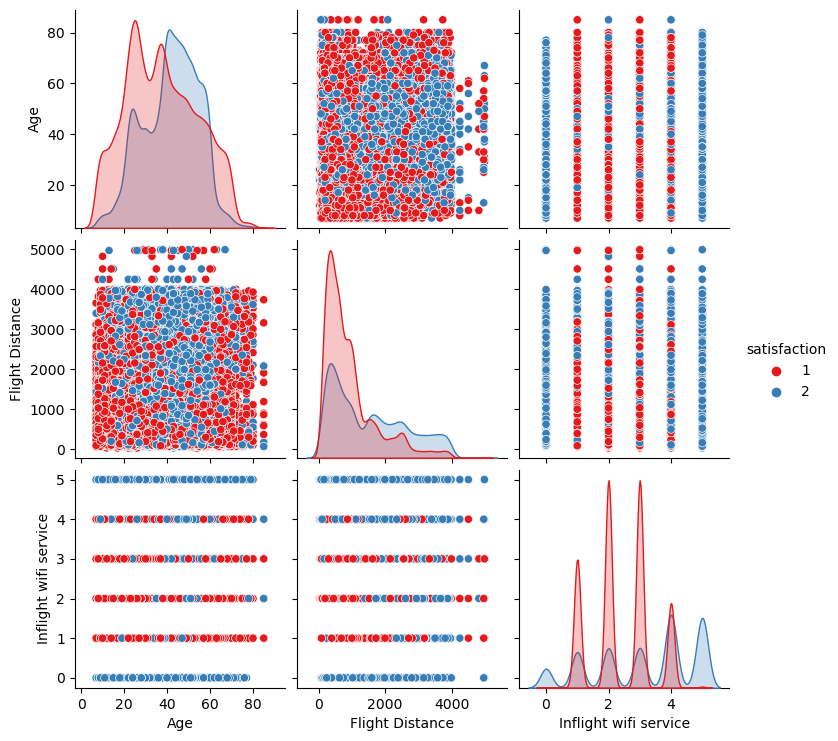

In [21]:
sns.pairplot(df_train[['Age', 'Flight Distance', 'Inflight wifi service', 'satisfaction']], hue='satisfaction', palette = "Set1")
plt.show()

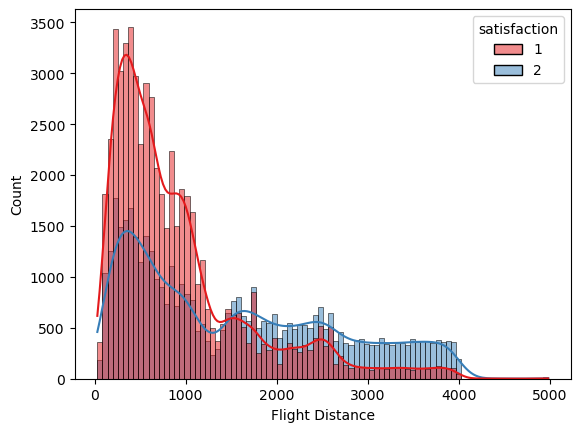

In [22]:
sns.histplot(data = df_train , x = df_train["Flight Distance"], hue = df_train["satisfaction"], palette = "Set1", kde = True)
plt.show()

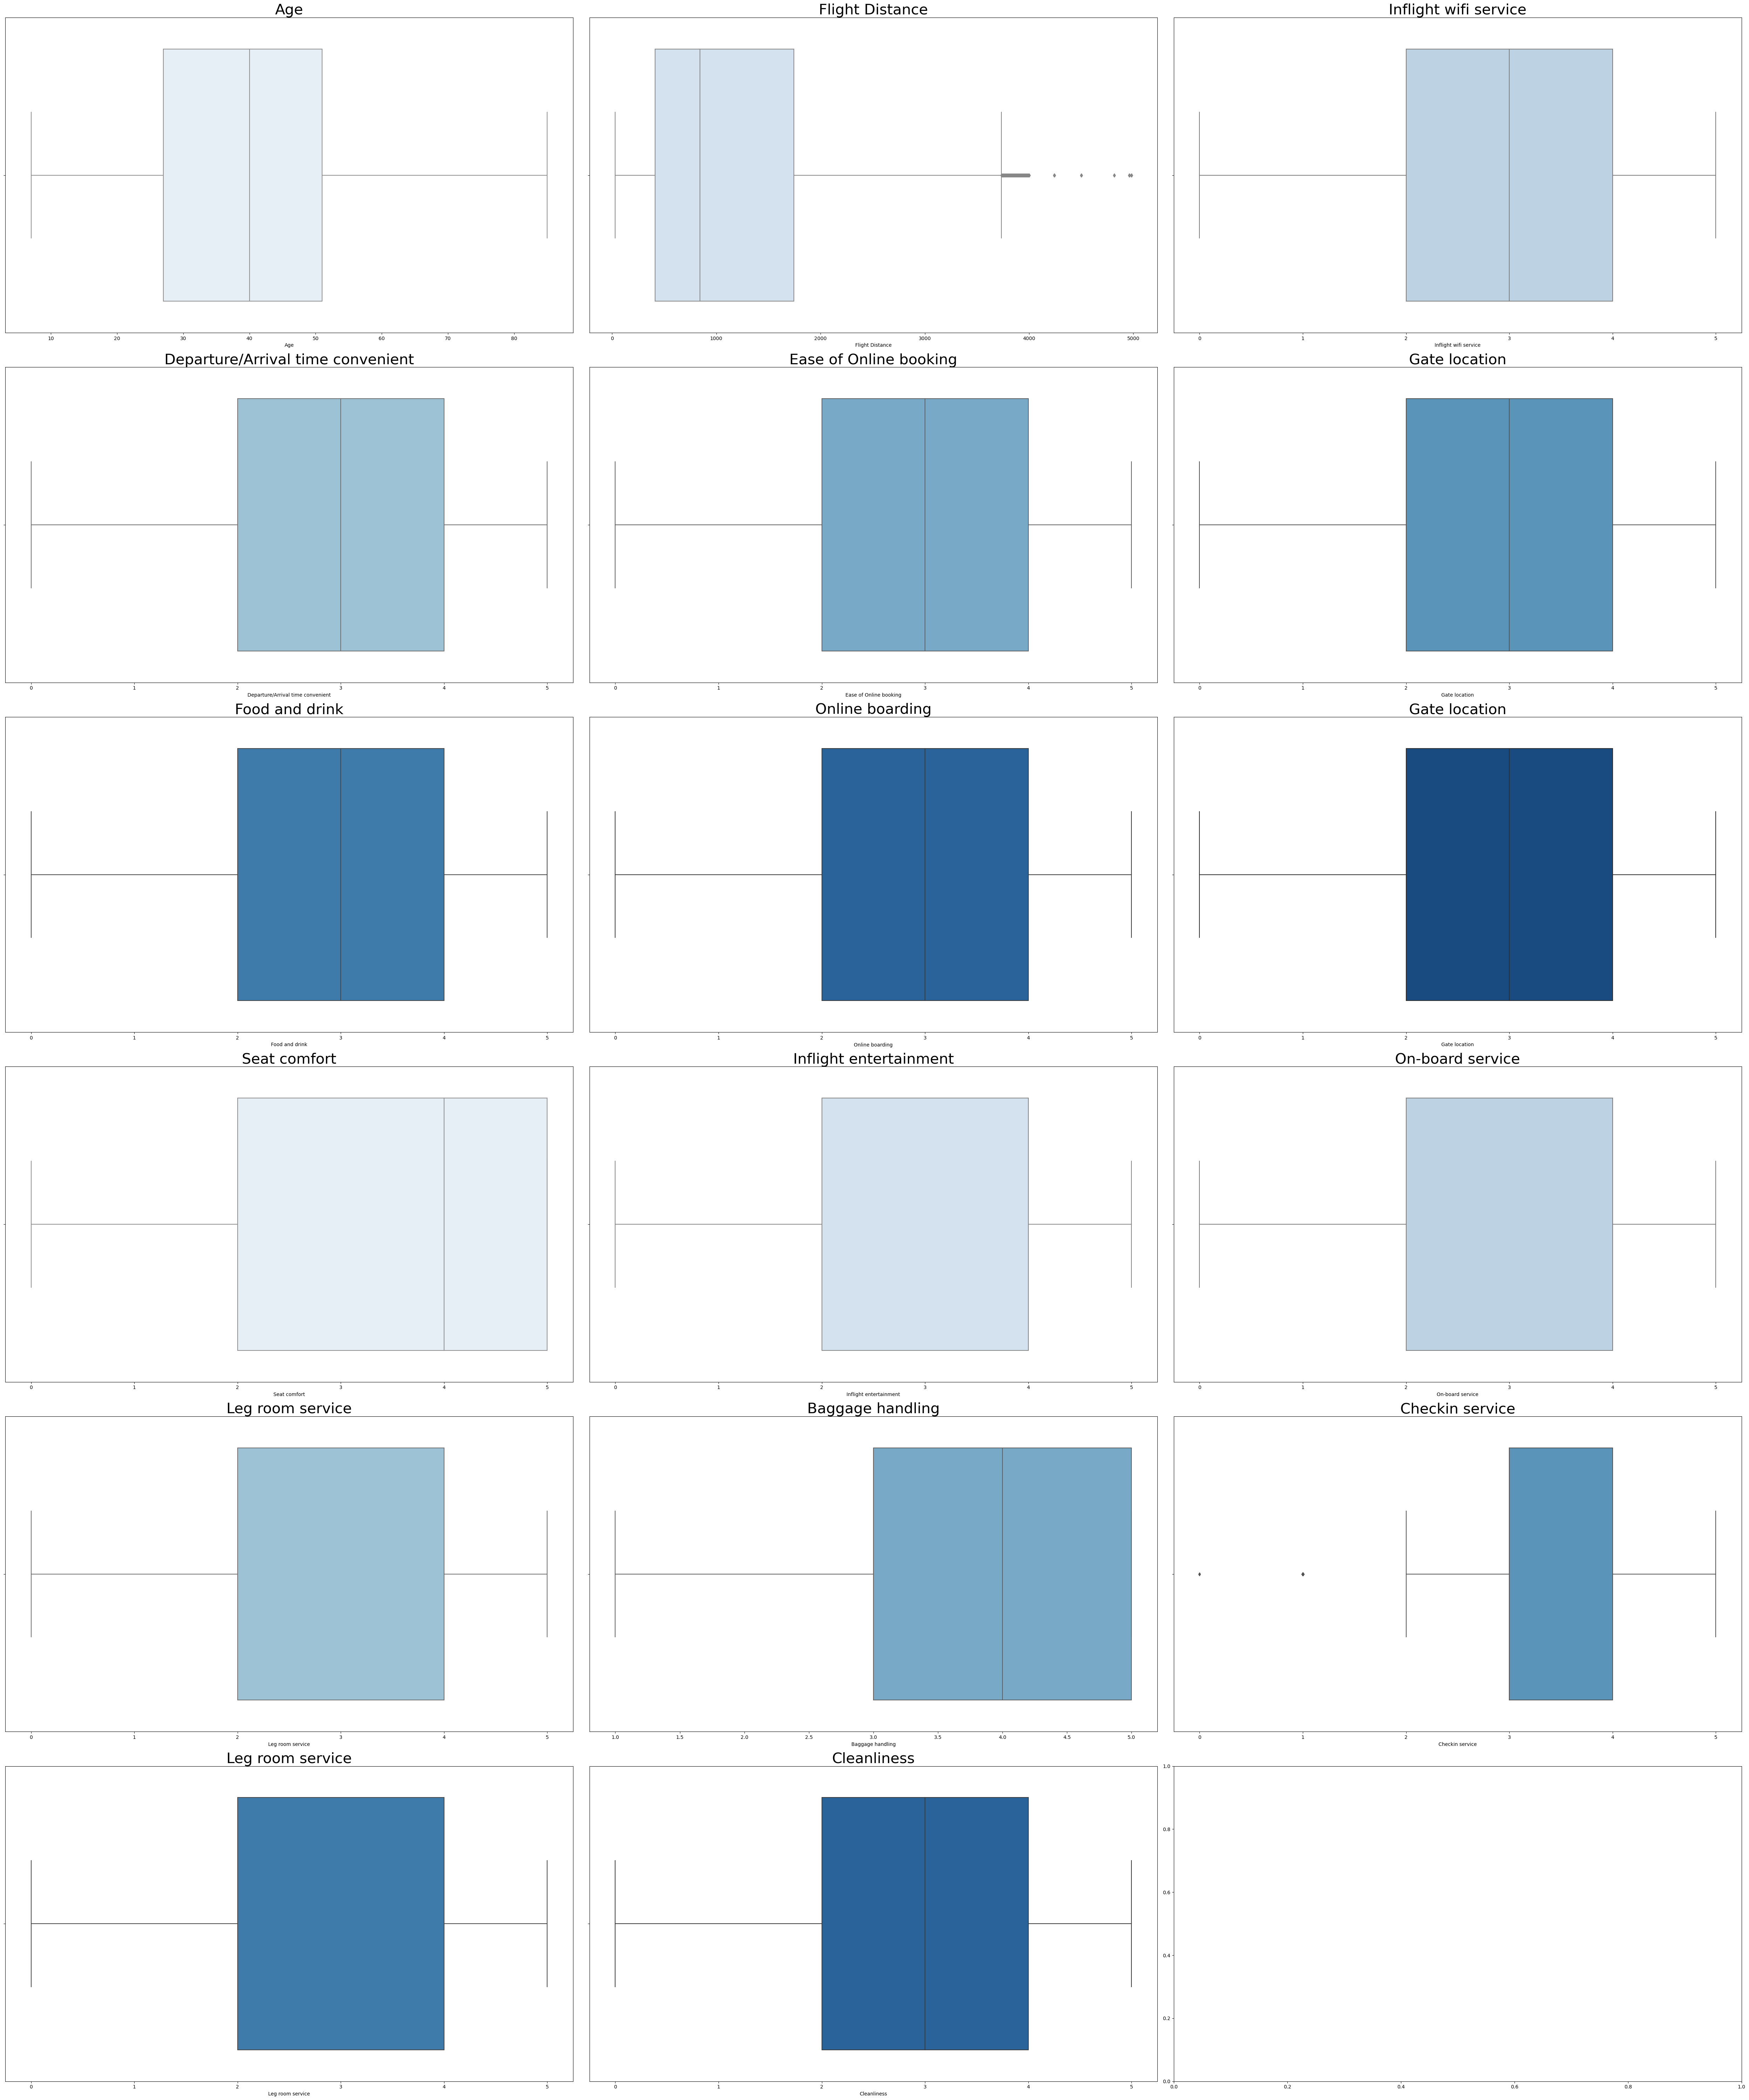

In [23]:
rows, cols = 6, 3
blue_palette = sns.color_palette("Blues", n_colors=9)

fig, axes = plt.subplots(rows, cols, figsize=(50, 60))
axes = axes.flatten()

ind = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Gate location',
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Leg room service', 'Cleanliness']

for i, col in enumerate(ind):
    if i < len(axes):
        sns.boxplot(x=df_train[col], ax=axes[i], color=blue_palette[i % len(blue_palette)])
        axes[i].set_title(col, fontsize=30)

plt.tight_layout()
plt.show()

In [36]:
cor = df_train.corr(numeric_only=True)
cor

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031558,0.008921,-0.006808,0.000399,0.006079,0.008964,0.008846,0.007166,0.000213,...,0.006071,0.008019,0.031842,0.037333,0.010438,0.038936,0.006439,0.002534,0.000396,0.012356
Customer Type,-0.031558,1.000000,-0.281821,0.308268,0.122246,-0.225363,-0.007706,-0.207007,-0.019627,0.006294,...,-0.110106,-0.056374,-0.047809,0.024890,-0.032065,0.023055,-0.083757,0.004329,0.004747,-0.187558
Age,0.008921,-0.281821,1.000000,0.048593,-0.101562,0.099838,0.017470,0.038038,0.024461,-0.001558,...,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147,0.137040
Type of Travel,-0.006808,0.308268,0.048593,1.000000,-0.361518,0.267642,0.104879,-0.259829,0.133399,0.030802,...,0.147978,0.056468,0.138680,0.031355,-0.017043,0.022492,0.078767,0.006046,0.005683,0.448995
Class,0.000399,0.122246,-0.101562,-0.361518,1.000000,-0.274996,-0.033297,0.054557,-0.071412,-0.001830,...,-0.123392,-0.117816,-0.121476,-0.085725,-0.078460,-0.084122,-0.085239,0.004829,0.006561,-0.320175
Flight Distance,0.006079,-0.225363,0.099838,0.267642,-0.274996,1.000000,0.007050,-0.019908,0.065697,0.004732,...,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426,0.298915
Inflight wifi service,0.008964,-0.007706,0.017470,0.104879,-0.033297,0.007050,1.000000,0.343758,0.715848,0.336127,...,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095,0.284163
Departure/Arrival time convenient,0.008846,-0.207007,0.038038,-0.259829,0.054557,-0.019908,0.343758,1.000000,0.437021,0.444601,...,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864,-0.051718
Ease of Online booking,0.007166,-0.019627,0.024461,0.133399,-0.071412,0.065697,0.715848,0.437021,1.000000,0.458746,...,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984,0.171507
Gate location,0.000213,0.006294,-0.001558,0.030802,-0.001830,0.004732,0.336127,0.444601,0.458746,1.000000,...,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143,0.000449


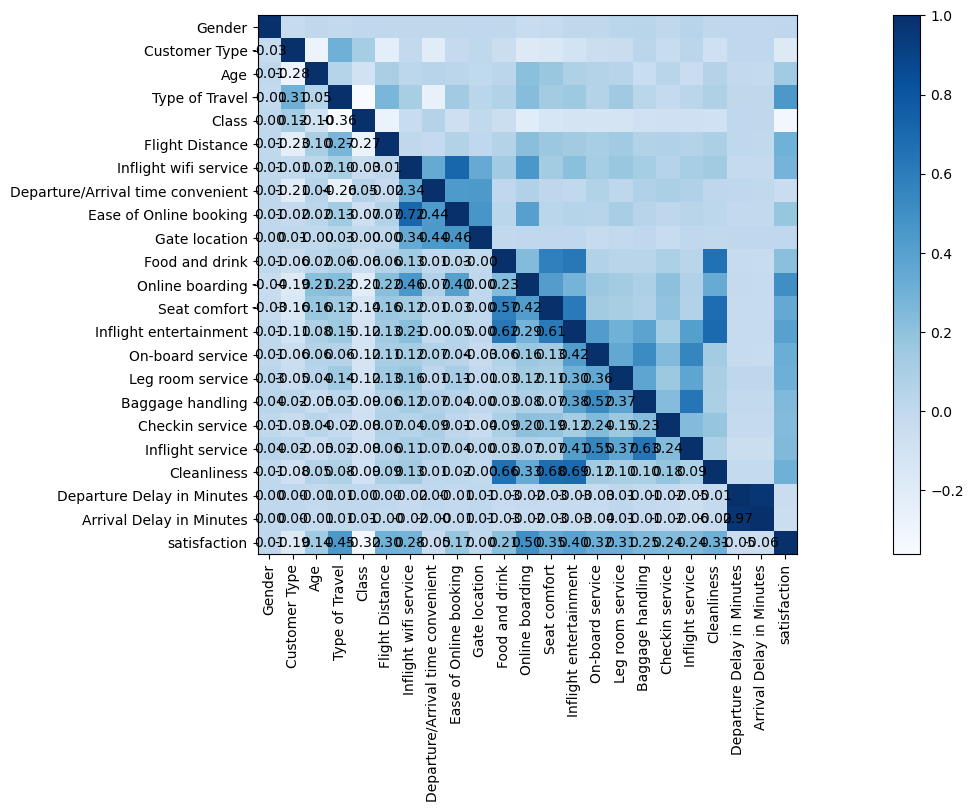

In [37]:
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(25, 7))
plt.imshow(cor, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(cor.columns)), cor.columns, rotation=90)
plt.yticks(range(len(cor.columns)), cor.columns)

for i in range(len(cor)):
    for j in range(len(cor)):
        if not mask[i, j]:
            plt.text(j, i, f"{cor.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

### Подготовка данных

In [34]:
X = df_train.loc[:,df_train.columns.tolist()[:-1]]
Y = df_train.loc[:,df_train.columns.tolist()[-1]]

In [42]:
from sklearn.model_selection import train_test_split
N_train = int(len(X) * 0.8)
N_test = len(X) - N_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = Y, random_state = 15)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## К-ближайших соседий

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [83]:
y_test_predict = knn.predict(X_test)

In [85]:
from sklearn.metrics import rand_score

rand_s = rand_score(Y_test, y_test_predict)
print('Оценка RAND: ', rand_s, '%')

err_test = 1 - knn.score(X_test, Y_test)
err_train = 1 - knn.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Оценка RAND:  0.8632091178769626 %
Ошибка на обучении: 5.1475113122171905%
Ошибка на тесте: 7.384526280225878%


## PCA

In [62]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [75]:
scaled_data_train = pd.DataFrame(X_train)
scaled_data_test = pd.DataFrame(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


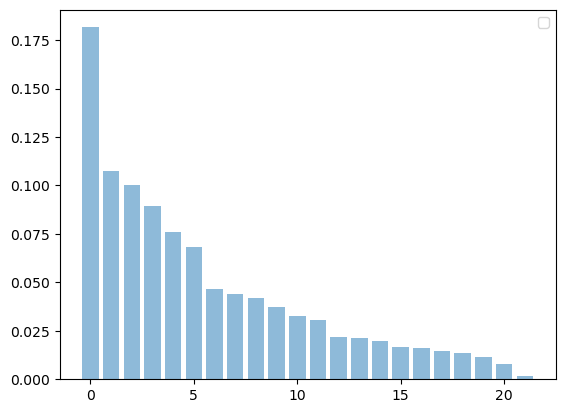

In [64]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.bar(range(0,22), var_exp, alpha=0.5,
        align='center')
plt.legend(loc='best')
plt.show()

**Мы видим, что никакие вектора больше 12 не дают никакой информации, поэтому мы можем понизить размерность до 12.**

In [117]:
pca_train = PCA(n_components = 12)
pca_train.fit(scaled_data_train)
data_pca_X_train = pca_train.transform(scaled_data_train)
data_pca_X_train = pd.DataFrame(data_pca_X_train)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [121]:
y_test_predict = knn.predict(X_test)
err_train = 1 - knn.score(X_train, Y_train)
err_test = 1 - knn.score(X_test, Y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 5.1475113122171905%
Ошибка на тесте: 7.384526280225878%


Из этого можно сделать вывод, что при понижении размерности в данном датаесте, ошибка возрастает. В данном случае найден лучший вариант, когда ошибка не такая большая. То есть чтобы более точно предсказывать значения "satisfaction", необходимо использовать все признаки датасета.

## RandomForest

In [122]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [123]:
Y_pred = tree_model.predict(X_test)

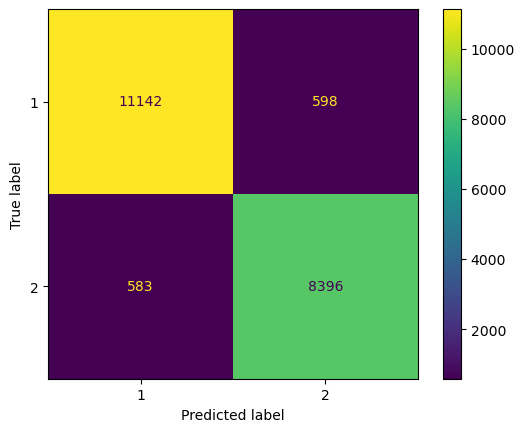

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_model.classes_)
disp.plot()
plt.show()

In [126]:
err_test = 1 - tree_model.score(X_test, Y_test)
err_train = 1 - tree_model.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0%
Ошибка на тесте: 5.700082050291999%


Вывод: ошибка в методе K-ближайших для тестовых данных получилась меньше

## Построим дерево решений для задачи классификации

In [127]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

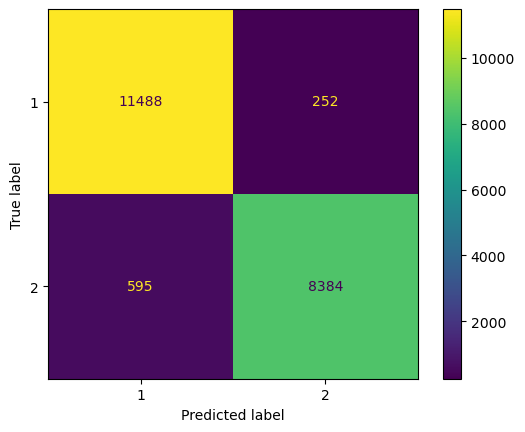

In [129]:
pred_labeles = rfc.predict(X_test)
cm = confusion_matrix(Y_test, pred_labeles, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [130]:
err_test = 1 - rfc.score(X_test, Y_test)
err_train = 1 - rfc.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0012066365007501467%
Ошибка на тесте: 4.088035136830925%


Вывод: ошибка уменьшилась.

Теперь подберем оптимальные значения гиперпараметров и построим график зависимости ошбики от количества деревьев

In [ ]:
n_estimators_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for n in n_estimators_arr:
    rfc_model = RandomForestClassifier(n_estimators = n)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    Y_train_res = np.reshape(Y_train, len(Y_train))
    y_train_pred_res = np.reshape(y_train_pred, (len(y_train_pred),1))
    Y_test_res = np.reshape(Y_test, len(Y_test))
    y_test_pred_res = np.reshape(y_test_pred, (len(y_test_pred),1))
    train_err.append(np.mean(Y_train_res != y_train_pred_res))
    test_err.append(np.mean(Y_test_res != y_test_pred_res))

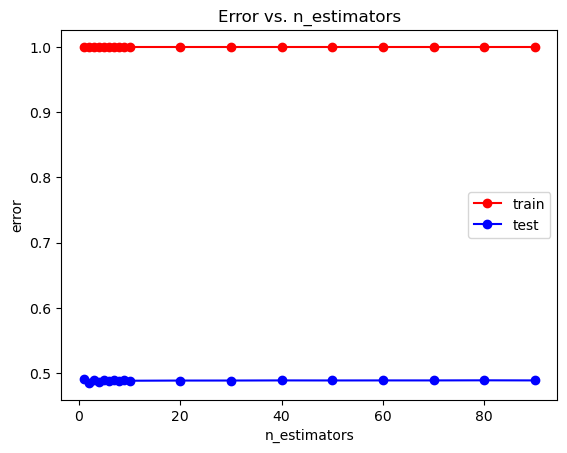

In [135]:
plt.plot(n_estimators_arr, train_err, 'r-o', label = 'train')
plt.plot(n_estimators_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

Теперь рассмотрим зависимость от параметра max_depth (максимальная глубина дерева)

In [ ]:
max_depth_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for depth in max_depth_arr:
    rfc_model = RandomForestClassifier(max_depth = depth)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    y_train_pred_res = np.reshape(y_train_pred, (len(y_train_pred),1))
    y_test_pred_res = np.reshape(y_test_pred, (len(y_test_pred),1))
    train_err.append(np.mean(Y_train_res != y_train_pred_res))
    test_err.append(np.mean(Y_test_res != y_test_pred_res))

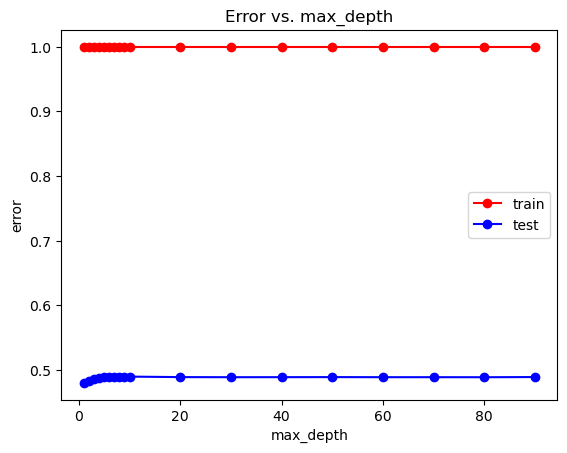

In [137]:
plt.plot(max_depth_arr, train_err, 'r-o', label = 'train')
plt.plot(max_depth_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

## Вывод: Всех лучше отработал метод RandomForest. Ошибка на обучающей выборке составила 0%, на тренировочной - 4.088035136830925%. Переобучения не наблюдалось ни в одном из методов. Также во всех методах Confusion matrix соответствовала полученной ошибке.